Autores: ....

### EDA

#### Normalización de datos y validación

* Utilizamos info() para revisar la estructura y los tipos de datos del conjunto.
    * Los detalles concretos con shape, columns o dtypes.
* Clasificación de región en Regiones y Ciudades
* Explorar datos, fechas, nulos, columnas innecesarias
* Discusión sobre qué hacer con los datos de semanas que faltan (interpolante)

##### Mostrar la estructura de datos del dataset avocados

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import avocado_manager as av
av.init()
df_cp = av.df("df_cp")
print(df_cp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           18249 non-null  int64         
 1   Date            18249 non-null  datetime64[ns]
 2   AveragePrice    18249 non-null  float64       
 3   Total Volume    18249 non-null  float64       
 4   Volume_Hass_S   18249 non-null  float64       
 5   Volume_Hass_L   18249 non-null  float64       
 6   Volume_Hass_XL  18249 non-null  float64       
 7   Total Bags      18249 non-null  float64       
 8   Small Bags      18249 non-null  float64       
 9   Large Bags      18249 non-null  float64       
 10  XLarge Bags     18249 non-null  float64       
 11  type            18249 non-null  object        
 12  year            18249 non-null  int64         
 13  region          18249 non-null  object        
 14  region_class    18249 non-null  object        
dtypes:

In [ ]:
data_shape = df_cp.shape
print(f"\nForma del DataFrame (filas, columnas): {data_shape}")

column_names = df_cp.columns
print(f"\nNombres de Columnas: {column_names}")
 
data_types = df_cp.dtypes
print(f"\nTipos de datos de cada columna:\n{data_types}")

##### Nuestra clasifiacion de clases de regiones

In [ ]:
print("Nuestra clasifiacion de clases de regiones:",pd.unique(df_cp['region_class']))
display(df_cp.head(5))

##### Mostrar las regions top 10 por Total Volume

In [ ]:
df_totales = df_cp.groupby('region')['Total Volume'].sum().reset_index()
display(df_totales.nlargest(10,'Total Volume').sort_values(by='Total Volume', ascending = False))
#df_largest = av.df("region_largest")
#display(df_largest)

##### Identificar fechas faltantes por cada region

In [ ]:
df_count = df_cp.groupby(['Date', 'region']).size().reset_index(name='Total')
df_pivot = df_count.pivot(index='Date', columns='region', values='Total').fillna(0)
diferencias = df_pivot.apply(lambda x: x.nunique() > 1, axis=0)

regiones_con_diferencias = diferencias[diferencias].index.tolist()
df_pivot[regiones_con_diferencias].plot(kind='line', marker='o',figsize=(16, 3))
plt.title('Número de filas(registros) por Región a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Registros')
plt.legend(title='Regiones:')
plt.grid(); plt.tight_layout() #plt.xticks(rotation=90)
plt.show()

##### Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo el número de filas y columnas, tipos de datos y valores faltantes. 

* Imprime la cantidad de valores faltantes por columna utilizando isnull().

In [ ]:
print(f"Cantidad de nulls: {df_cp.isnull().sum()}")
#df.isnull
#missing_values = pd.isnull(df)

# Resumen Estadístico
data_summary = df_cp.describe()
print("\nResumen Estadístico:")
print(data_summary)

# series de tiempo
print("\nseries de tiempo:")
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
ventas_mensual = df_cp.groupby(df_cp['Date'].dt.to_period("M"))['Total Volume'].sum().reset_index()
display(ventas_mensual)

#### Visión global de datos

* Analisis de Series Temporales y Ruido asociado
* Precios promedio calibre 
* Precios promedio por bolsa
* Separar avocados convencional y organics
* Comparación precios promedio convencional y organico
* Representación de ventas totales sobre precio promedio ( por regiones o no )

##### Analisis de Series Temporales y Ruido asociado

In [ ]:
print(f"Ragos de fechas: mínima: {df_cp.Date.min()} máxima: {df_cp.Date.max()}")

df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()
df_cp_conventional = df_cp[df_cp['type'] =='conventional']#[['Date', 'AveragePrice']]
df_grouped = df_cp_conventional.groupby('Date')['AveragePrice'].mean()

# Descomposicio de la serie de tiemps: 39 mesos si considerem que tenim del 1-1-2015 fins al 25-3-2018
df_decomp = seasonal_decompose(df_grouped, model='additive', period=(int)(52*1)) #maxim: 84

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.observed, label='avocado convencional')
plt.legend(loc='best');plt.grid(True)
#plt.title('Tendencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.trend, color='red', label='Tendencia mensual(avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Tendencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.seasonal, label='Estacionalidad (avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Estacionalidad')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.resid, color='green', label='Residuo (avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Residuo')
plt.tight_layout()
plt.show()

In [ ]:
print("Organic")

df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()
df_cp_organic = df_cp[df_cp['type'] =='organic']
df_grouped = df_cp_conventional.groupby('Date')['AveragePrice'].mean()
# Descomposicio de la serie de tiemps: 39 mesos si considerem que tenim del 1-1-2015 fins al 25-3-2018
df_decomp = seasonal_decompose(df_grouped, model='additive', period=(int)(52*1)) #maxim: 84
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df_grouped, label='avocado Organic')
plt.legend(loc='best');plt.grid(True)
plt.subplot(412)
plt.plot(df_decomp.trend, color='red', label='Tendencia (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.subplot(413)
plt.plot(df_decomp.seasonal,label='Estacionalidad (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.subplot(414)
plt.plot(df_decomp.resid, color='green',label='Residuales (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.tight_layout()
plt.show()

##### Precios promedio calibre 

##### Precios promedio por bolsa

##### Separar avocados convencional y organics

In [ ]:
df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 3))
plt.plot(df_grouped, label ='Precio Medio')
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

df_grouped = df_cp.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean()
plt.figure(figsize=(12,3))
plt.plot(df_grouped, label='Precio medio mensual') #plt.plot(df_grouped.index, df_grouped.values)
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Precio medio')
plt.title('Precio medio mensual')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

df_cp_conventional = df_cp[df_cp['type'] =='conventional'] #[['Date', 'AveragePrice']]
df_grouped_conv = df_cp_conventional.groupby('Date')['AveragePrice'].mean()

df_cp_organic = df_cp[df_cp['type'] =='organic'] #[['Date', 'AveragePrice']]
df_grouped_orga = df_cp_organic.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 3))
plt.plot(df_grouped_conv, label ='Precio Medio convencional')
plt.plot(df_grouped_orga, label ='Precio Medio organic')
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo segun tipo alvocado')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

#df_grouped

##### Comparación precios promedio convencional y organico
* Aqui veiem que existeixen unes regions mes relevants que altres. Caldria fer una separació?

In [ ]:
df_subset = df_cp#[df_cp['region']!= 'TotalUS']
pd.unique(df_subset['region'])

grouped = df_subset.groupby(['region', 'type'])['Total Volume'].sum()

fig, ax= plt.subplots(figsize=(20,4))
grouped.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

In [ ]:
price_group = df_subset.groupby(['region', 'type'])['AveragePrice'].mean()#.nlargest(10)

fig, ax= plt.subplots(figsize=(20,4))
price_group.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

In [ ]:
## Aquest gràfic es espectacular, y ens permet veure que sempre són els alvocats orgànics els que costen més que la mitjana.
avocados_region_mean = df_subset.groupby(['region','type'])['AveragePrice'].mean()#.nlargest(6)

total_mean = df_subset['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation', color = ['slategray', 'forestgreen'])
plt.grid()

In [ ]:
# Si mirem la proporcio, en general es manté constant. No hi ha ningun interes per a tornar a ho natural a les gran ciutats o extensions.
# Si acas hi ha més divergencia en extensions menors.
unstacked_type= grouped.unstack()
unstacked_type['Proportion'] = unstacked_type['conventional']/unstacked_type['organic']

fig, ax= plt.subplots(figsize=(20,4))
x_values= unstacked_type['conventional']
y_values= unstacked_type['Proportion']

ax.scatter(x=x_values, y= y_values )
# plt.ylim(0, 0.3*10**9)
plt.grid()

##### Ventas en el tiempo y separación entre convencional / orgánico

In [ ]:
df_date_volume = df_cp[['Date', 'Total Volume']]
#df_cp_organic = df_cp[df_cp['type'] =='organic'] #[['Date', 'AveragePrice']]
#df_date_volume
df_grouped_conventional = df_date_volume[df_cp['type'] =='conventional'].groupby('Date').sum('Total Volume')
df_grouped_organic = df_date_volume[df_cp['type'] =='organic'].groupby('Date').sum('Total Volume')

# Graficar
plt.figure(figsize=(20,3))
plt.plot(df_grouped_conventional, label='Volumen total ventas (conventional)')
plt.title('Volumen total de ventas a lo targo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.legend(loc='best'); plt.grid(True)
plt.plot(df_grouped_organic, label='Volumen total ventas (organic)')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.legend(loc='best'); plt.grid(True)
plt.show()

plt.figure(figsize=(20,3))
plt.plot(df_grouped_conventional, label='Volumen total ventas (conventional) escala logaritmica')
plt.title('Volumen total de ventas a lo targo del tiempo - escala logaritmica')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.yscale('log')
plt.legend(loc='best'); plt.grid(True)
plt.plot(df_grouped_organic, label='Volumen total ventas (organic) escala logaritmica')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.yscale('log')
plt.legend(loc='best'); plt.grid(True)
plt.show()

##### Análisis de Cambios en Precios Anuales:

In [ ]:
df_year_price = df_cp.groupby('year')['AveragePrice'].mean()
df_year_price_conventional = df_cp[df_cp['type'] =='conventional'].groupby('year')['AveragePrice'].mean()
df_year_price_organic = df_cp[df_cp['type'] =='organic'].groupby('year')['AveragePrice'].mean()

# Graficar
plt.figure(figsize=(10, 2)) 
df_year_price.plot.bar(label ='Precio medio', color ='blue', alpha=1) # x='aaa??',y='bbb??',
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precio medio anual')
plt.legend(loc='lower right'); plt.grid(True)
plt.xticks(rotation=0)
plt.show()
display(df_year_price)

plt.figure(figsize=(10, 2)) 
df_year_price_organic.plot.bar(label ='Precio medio alvocado organic', color ='green') # x='aaa??',y='bbb??',
df_year_price_conventional.plot.bar(label ='Precio medio alvocado conventional', color ='grey') # x='aaa??',y='bbb??',
#df_year_price.plot.bar(label ='Precio medio', color ='blue', alpha=0.2) # x='aaa??',y='bbb??',
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precio medio anual')
plt.legend(loc='lower right'); plt.grid(True)
plt.xticks(rotation=0)
plt.show()

##### Representación de ventas totales sobre precio promedio ( por regiones o no )

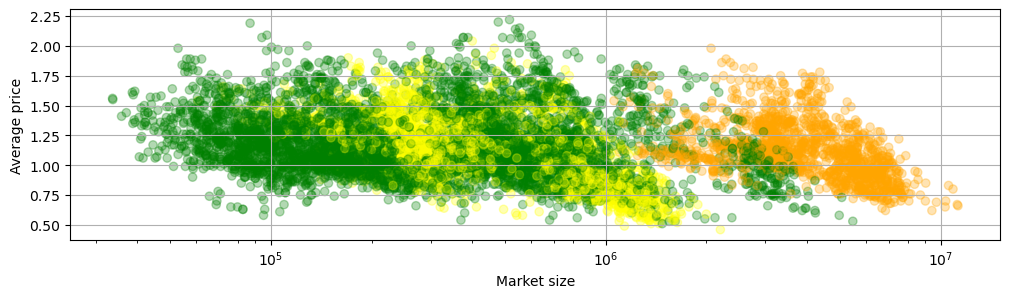

In [7]:
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']

fig, ax= plt.subplots(figsize=(12,3))
x_values = df_convencionals['Total Volume']
y_values = df_convencionals['AveragePrice']
c_values= list(df_convencionals['region_class'].map(av.classification_colors()))

plt.scatter(x= x_values, y= y_values, c=c_values, alpha = 0.3)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size')
plt.grid()

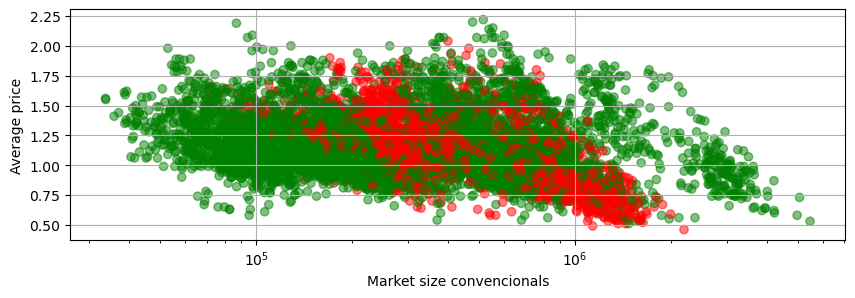

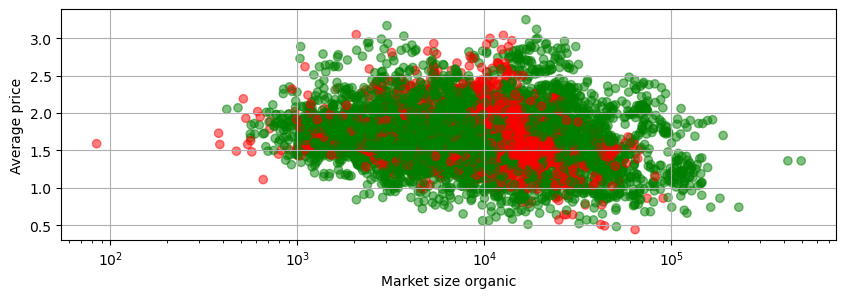

In [10]:
classification_colors = {'City':'green' ,'Region':'red' ,'GreaterRegion':'orange', 'TotalUS': 'blue'}

df_subset = av.df("df_city_region") # df_cp[df_cp['region']!= 'TotalUS']
df_organic = df_subset[df_subset['type']=='organic']
df_convencionals = df_subset[df_subset['type']=='conventional']

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_convencionals['Total Volume']
y_values = df_convencionals['AveragePrice']
c_values= list(df_convencionals['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size convencionals')
plt.grid()

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_organic['Total Volume']
y_values = df_organic['AveragePrice']
c_values= list(df_organic['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size organic')
plt.grid()

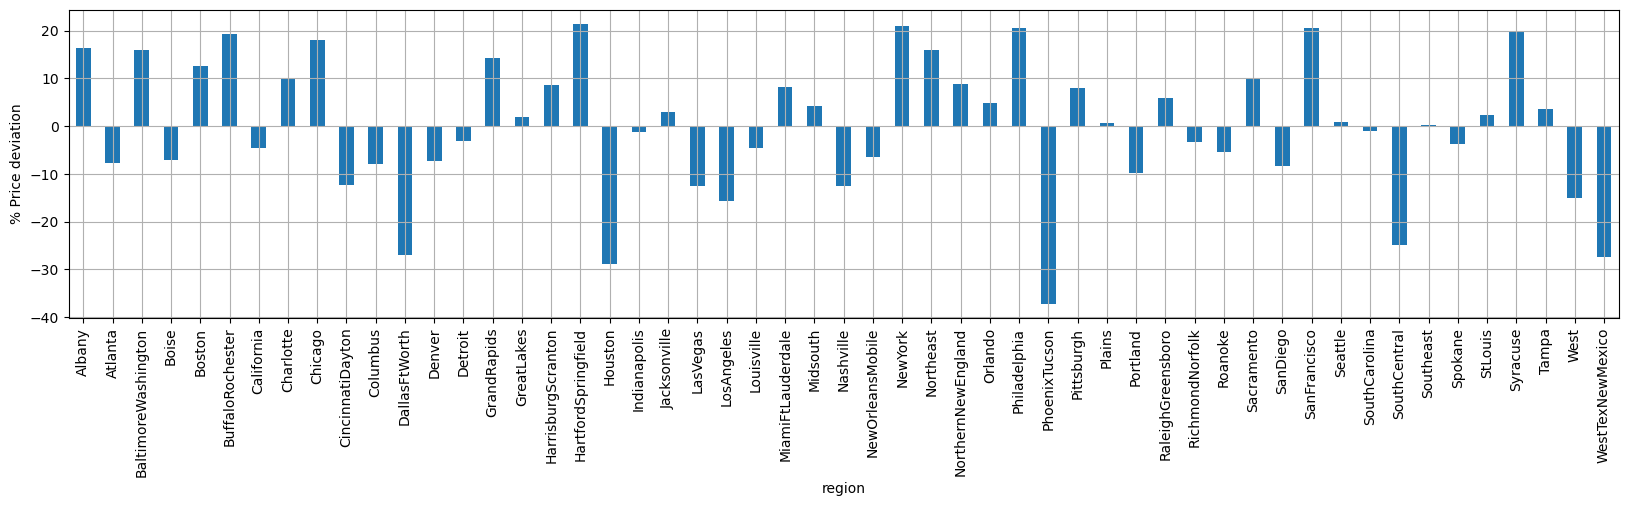

In [8]:
# Claramente hay sitios donde los aguacates son más baratos, miremos si tiene que ver con otras características
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']
convencional_region_mean = df_convencionals.groupby('region')['AveragePrice'].mean()#.nlargest(6)
coloring=convencional_region_mean.index.map(av.region_classification()).map(av.classification_colors())
total_mean = df_convencionals['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = ((convencional_region_mean - total_mean)*100/total_mean)
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation')#, color= coloring)#, color= convencional_region_mean.index.map(classification_colors))
plt.grid()

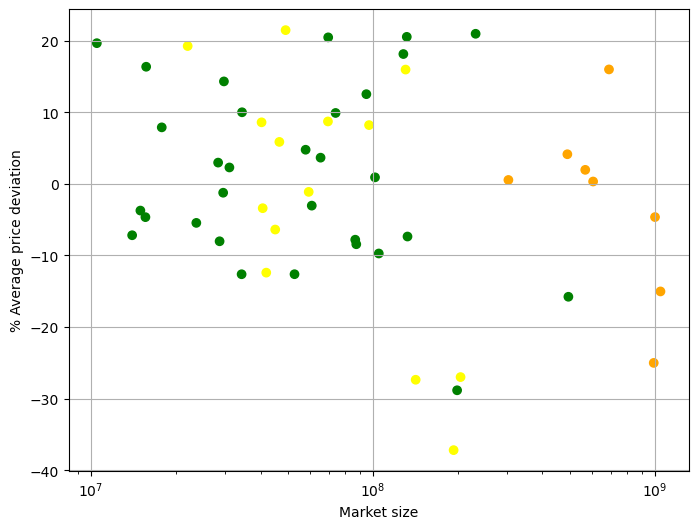

In [9]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
# Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados

convencional_region_mean_total = df_convencionals.groupby('region').agg({'Total Volume':'sum', 'AveragePrice':'mean'})#.nlargest(6)
convencional_region_mean_total['region_class'] = convencional_region_mean_total.index.map(av.region_classification())

fig, ax= plt.subplots(figsize=(8,6))
x_values = convencional_region_mean_total['Total Volume']
total_mean = convencional_region_mean_total['AveragePrice'].mean()
y_values = (convencional_region_mean_total['AveragePrice'] - total_mean)*100/total_mean
c_values= list(convencional_region_mean_total['region_class'].map(av.classification_colors()))

plt.scatter(x= x_values, y= y_values, c=c_values)
plt.xscale('log')
plt.ylabel('% Average price deviation')
plt.xlabel('Market size')
plt.grid()

### ANALISIS

#### Separar alvocats convencionals i alvocats orgànics

#### Impacto del precio en las ventas

#### Estacionalidad por región

In [ ]:
get_season = av.get_season()

df_date_price_volume = df_cp[['Date', 'region', 'AveragePrice', 'Total Volume']]
df_date_price_volume = df_date_price_volume.reset_index()
df_date_price_volume['Season'] = df_date_price_volume['Date'].apply(get_season)
# df_date_price_volume

df_grouped_mean = df_date_price_volume.groupby(['Season','region'])['AveragePrice'].mean()
df_grouped_mean = df_grouped_mean.reset_index()

seasons = df_grouped_mean['Season'].unique()
plt.figure(figsize=(20, 8)) 
for season in seasons:
    df_season = df_grouped_mean[df_grouped_mean['Season'] == season]
    plt.plot(df_season['region'], df_season['AveragePrice'], marker='.', label=season)
plt.title('Precio medio por temporada y región')
plt.xlabel('Región')
plt.ylabel('Precio medio')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#df_grouped_mean

#### Correlacion de les "grans regions" i regions amb volum total US

#### Correlacion de volum total de les ciutats amb volum total US

#### Elasticidad

#### Analisis por Cohortes

#### Matriz de correlaciones de todas las variables según  apartado 5.6. En especial, precio medio y relación con diferentes calibres.

#### Dispersión entre variables claves según 5.2

### REGRESIONES Y PROYECCIONES

#### Creación del modelo de regresión

#### Creación de modelo predictivo de ventas por MES usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Creación de modelo predictivo de ventas por TRIMESTRE usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Creación de modelo predictivo de ventas por AÑO usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Modelos de regresión multiple entre todas las variables según  apartado 5.6. En especial, precio medio y relación con diferentes calibres.Precio vs Total Bags

#### Analisis de coeficientes de regresion multiple. Afectación de cada variable al AvgPrice apartado 5.7

#### Modelos de regresión para diferenciar volumenes de ventas Apartado 5.8 . Calibres y AveragePrice.

#### Creación de modelo de regresión y polinómica de ventas totales sobre precio promedio ( por regiones o no ) apartado 5.9

#### Predicciones

#### Predicción de precio promedio según volumen aguacates y por tipo ( y por calibres ??) . Lineal y Polinomica. Calculo de R2